In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import seaborn as sns
import pickle
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
import joblib

In [ ]:
base_path = '/content/drive/My Drive/TA_OmarDhani/'

with open(base_path + 'X_train.pickle', 'rb') as f:
    X_train = pickle.load(f)

with open(base_path + 'X_val.pickle', 'rb') as f:
    X_val = pickle.load(f)

with open(base_path + 'X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)

with open(base_path + 'y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open(base_path + 'y_val.pickle', 'rb') as f:
    y_val = pickle.load(f)

with open(base_path + 'y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)


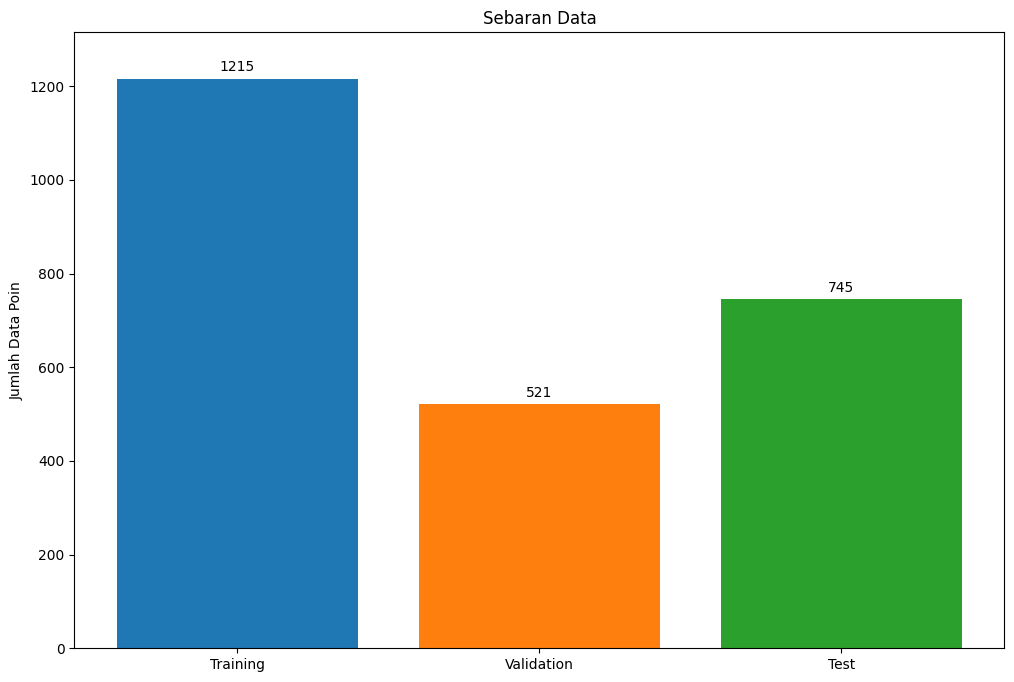

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of data points in each set
num_train = len(y_train)
num_val = len(y_val)
num_test = len(y_test)

# Data to plot
data = {'Training': num_train, 'Validation': num_val, 'Test': num_test}

# Create bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(data.keys(), data.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, int(yval), ha='center', va='bottom', color='black')

# Update the title and labels in Bahasa Indonesia
plt.title('Sebaran Data')
plt.ylabel('Jumlah Data Poin')
plt.ylim(0, max(data.values()) + 100)  # Add some space above the highest bar

plt.show()


In [ ]:
# Filenames for the history files
history_files = [
    "history_Scheme1.pkl",
    "history_Scheme2.pkl",
    "history_Scheme3.pkl",
    "history_Scheme4.pkl"
]
# Dictionary to store the history data
histories = {}

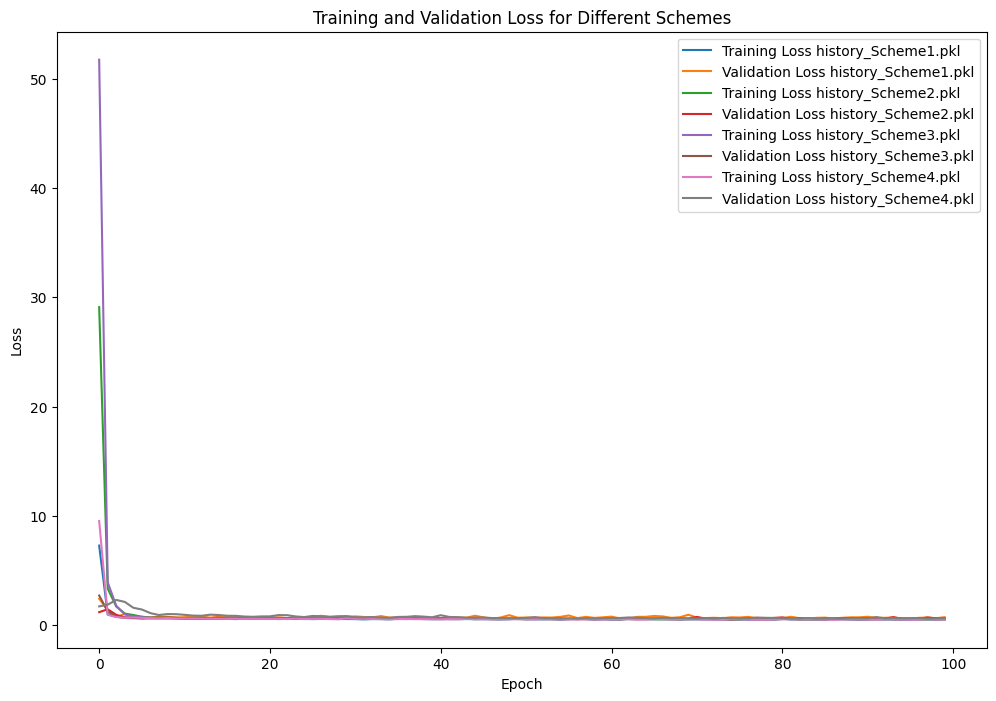

In [ ]:
# Dictionary to store the history data
histories = {}

# Load the history data from each file
for file in history_files:
    with open(base_path + file, 'rb') as f:
        histories[file] = pickle.load(f)

# Plot the training and validation loss for each scheme
plt.figure(figsize=(12, 8))

for file, history in histories.items():
    plt.plot(history['loss'], label=f'Training Loss {file}')
    plt.plot(history['val_loss'], label=f'Validation Loss {file}')

plt.title('Training and Validation Loss for Different Schemes')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

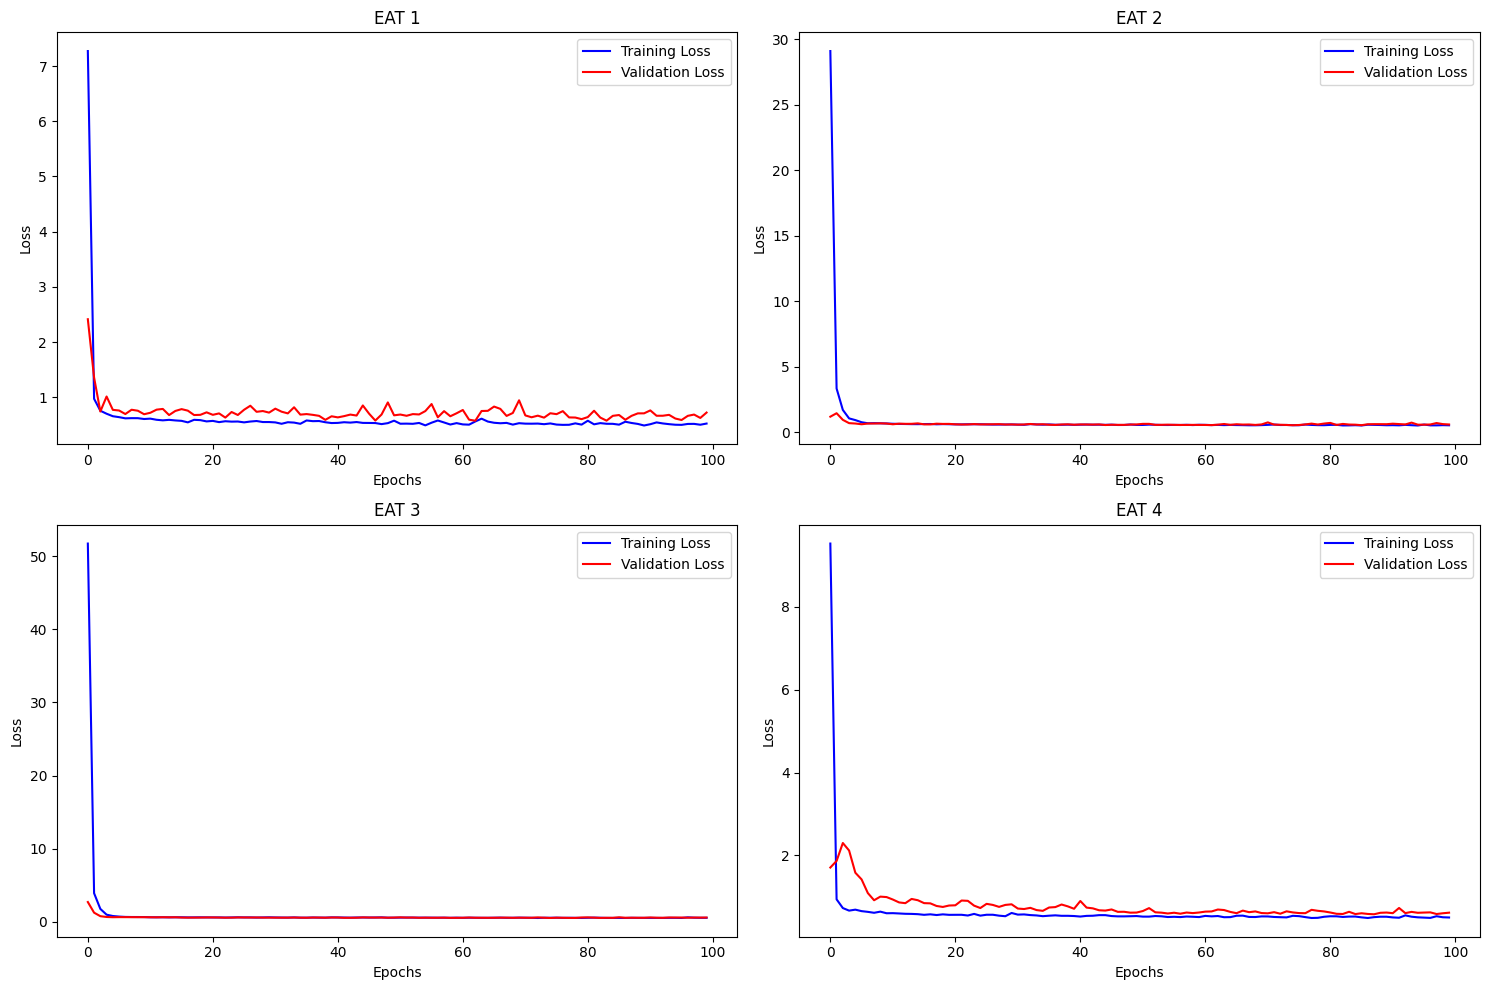

In [ ]:
# Create subplots for each scheme
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, (file, history) in enumerate(histories.items()):
    axes[i].plot(history['loss'], label='Training Loss', color='blue')
    axes[i].plot(history['val_loss'], label='Validation Loss', color='red')
    axes[i].set_title(f'EAT {i+1}')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Loss')
    axes[i].legend()

plt.tight_layout()
plt.show()

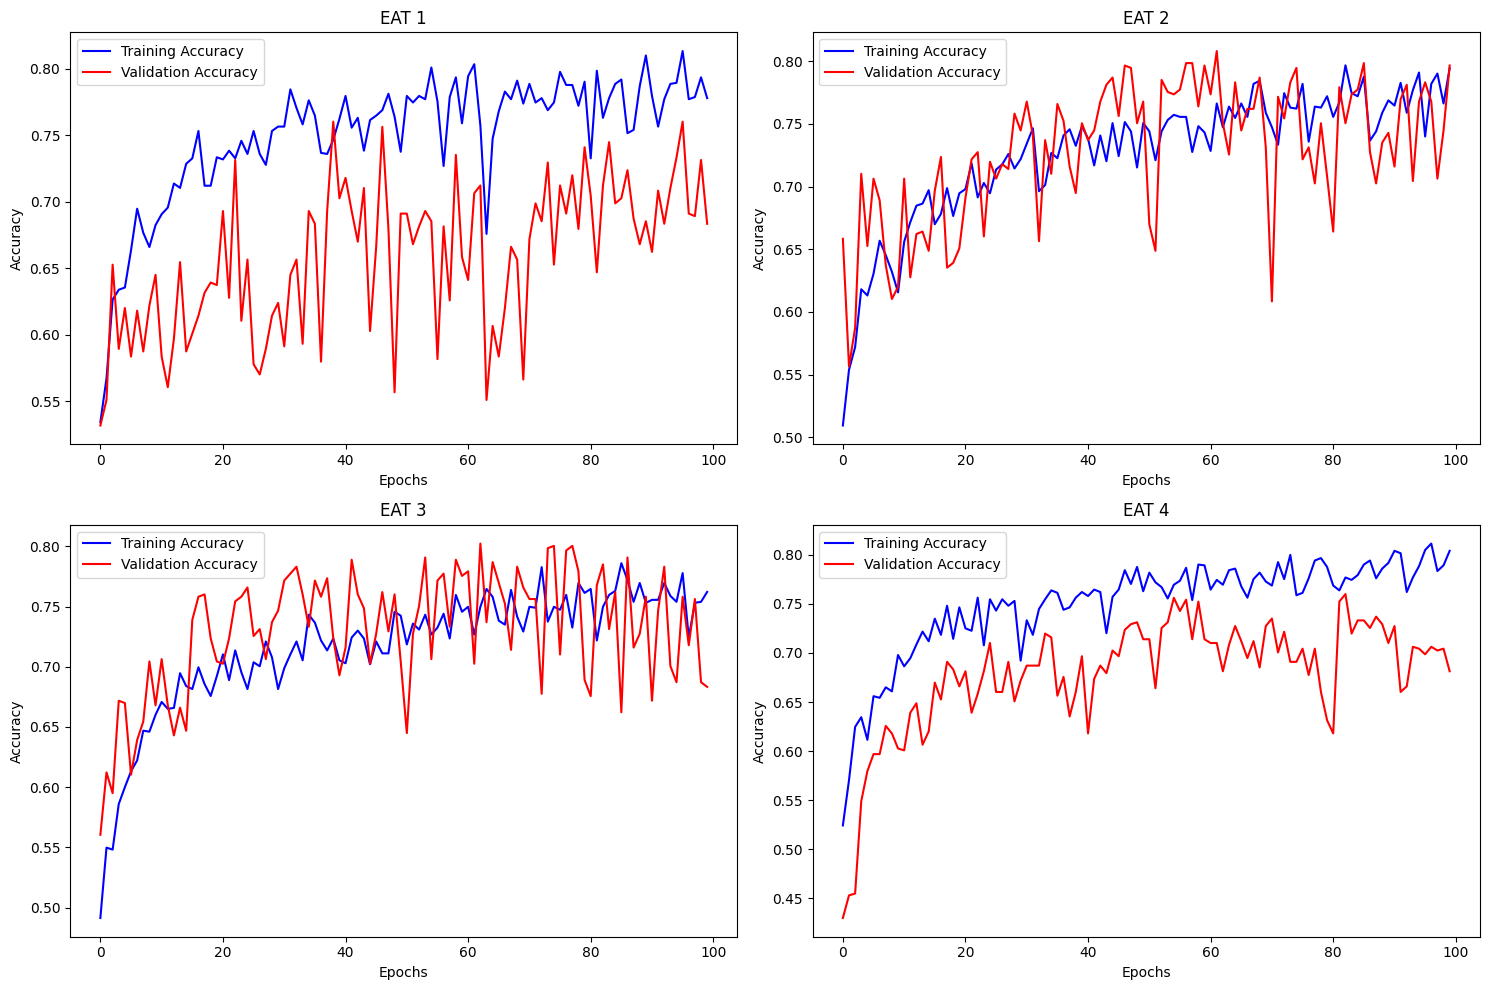

In [ ]:
# Create subplots for each scheme
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, (file, history) in enumerate(histories.items()):
    axes[i].plot(history['accuracy'], label='Training Accuracy', color='blue')
    axes[i].plot(history['val_accuracy'], label='Validation Accuracy', color='red')
    axes[i].set_title(f'EAT {i+1}')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Accuracy')
    axes[i].legend()

plt.tight_layout()
plt.show()